---
title: "Exercises"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


## loading data and pre-processing

Import relevant packages

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import urllib.request
from scipy.stats import genextreme
from scipy.optimize import curve_fit

Go to NOAA's National Centers for Environmental Information (NCEI)  
[Climate Data Online: Dataset Discovery](https://www.ncdc.noaa.gov/cdo-web/datasets)

Find station codes in this [map](https://www.ncei.noaa.gov/maps/monthly/). On the left, click on the little wrench next to "Global Summary of the Month", then click on "identify" on the panel that just opened, and click on a station (purple circle). You will see the station's name, it's ID, and the period of record. For example, for Ben-Gurion's Airport in Israel:  
BEN GURION, IS  
STATION ID: ISM00040180  
Period of Record: 1951-01-01 to 2020-03-01

You can download **daily** or **monthly** data for each station. Use the function below to download this data to your computer. `station_name` can be whatever you want, `station_code` is the station ID.

If everything fails and you need easy access to the files we'll be using today, click here:  
<a href="Eilat_daily.csv" download>Eilat daily</a>.

In [24]:
def download_data(station_name, station_code):
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    # download daily data - uncomment the following 2 lines to make this work
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                              station_name + '_daily.csv')
    # download monthly data
    urllib.request.urlretrieve(url_monthly + station_code + '.csv',
                               station_name + '_monthly.csv')

Download daily rainfall data for Eilat, Israel. ID: IS000009972

In [25]:
download_data('Eilat', 'IS000009972')

Then load the data into a dataframe.  
**IMPORTANT!!** daily precipitation data is in tenths of mm, divide by 10 to get it in mm.  
How do we know that? It's in the [documentation](https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt)!

In [26]:
df = pd.read_csv('Eilat_daily.csv', sep=",")
# make 'DATE' the dataframe index
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
# IMPORTANT!! daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
df['PRCP'] = df['PRCP'] / 10
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,,,,,,,
1949-11-30,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1949-12-01,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1949-12-02,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1949-12-03,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1949-12-04,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,IS000009972,29.55,34.95,12.0,"ELAT, IS",NaN,NaN,231.0,",,S",108.0,",,S",170.0,"H,,S"
2024-01-17,IS000009972,29.55,34.95,12.0,"ELAT, IS",NaN,NaN,211.0,",,S",117.0,",,S",164.0,"H,,S"
2024-01-18,IS000009972,29.55,34.95,12.0,"ELAT, IS",NaN,NaN,240.0,",,S",111.0,",,S",174.0,"H,,S"


Plot precipitation data ('PRCP' column) and see if everything is all right.

Text(0.5, 1.0, 'Eilat, 1949–2024')

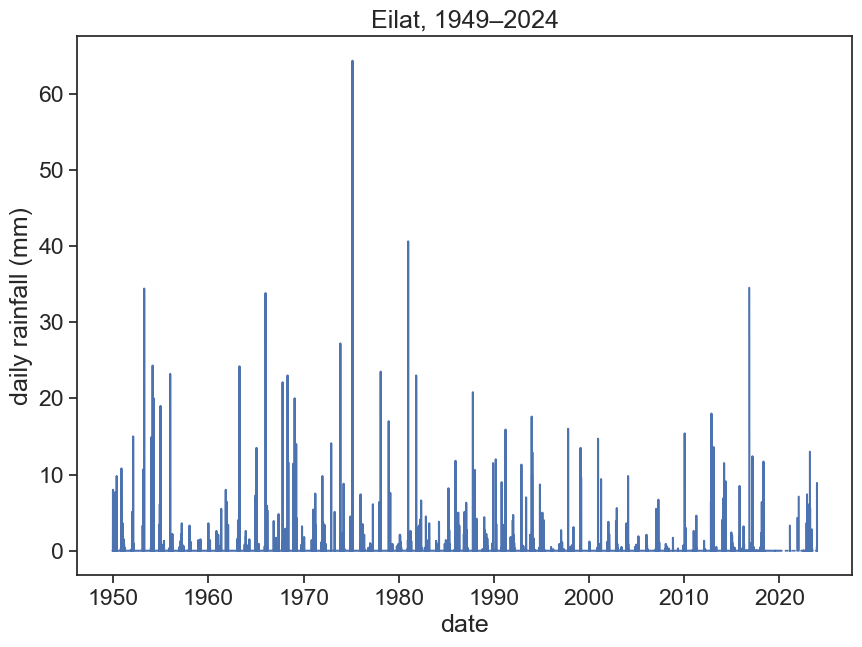

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df['PRCP'])
ax.set_xlabel("date")
ax.set_ylabel("daily rainfall (mm)")
ax.set_title("Eilat, 1949–2024")

Based on what you see, you might want to exclude certain periods, e.g.:

In [28]:
last_date = '2018-08-01'
first_date = '1950-08-01'
df = df.loc[first_date:last_date]
df

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
DATE,,,,,,,,,,,,,
1950-08-01,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",410.0,",,G",250.0,",,G",NaN,NaN
1950-08-02,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",400.0,",,G",240.0,",,G",NaN,NaN
1950-08-03,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",410.0,",,G",260.0,",,G",NaN,NaN
1950-08-04,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",400.0,",,G",260.0,",,G",NaN,NaN
1950-08-05,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,E",NaN,NaN,240.0,",,G",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-28,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,S",386.0,",,S",NaN,NaN,329.0,"H,,S"
2018-07-29,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,S",NaN,NaN,268.0,",,S",334.0,"H,,S"
2018-07-30,IS000009972,29.55,34.95,12.0,"ELAT, IS",0.0,",,S",375.0,",,S",277.0,",,S",327.0,"H,,S"


The rainfall data for Eilat is VERY seasonal, it's easy to see that there is no rainfall at all during the summer. We can assume a hydrological year starting on 1 August. If you're not sure, you can plot the monthly means (see last week's lecture) and find what date makes sense best.

In [29]:
df_month = df['PRCP'].resample('M').sum().to_frame()
df_month_avg = (df_month['PRCP']
                  .groupby(df_month.index.month)
                  .mean()
                  .to_frame()
               )
df_month_avg

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_71663/1784230487.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df['PRCP'].resample('M').sum().to_frame()


,PRCP
DATE,
1,3.445588
2,4.629412
3,3.958824
4,2.483824
5,1.086765
6,0.000000
7,0.000000
8,0.000000
9,0.008824


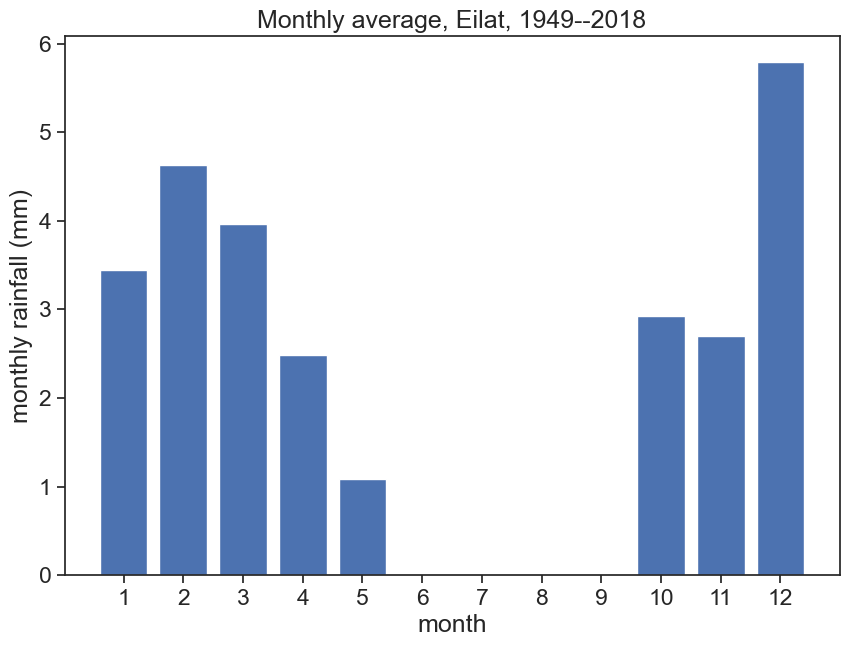

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(df_month_avg.index, df_month_avg['PRCP'])
ax.set(xlabel="month",
       ylabel="monthly rainfall (mm)",
       title="Monthly average, Eilat, 1949--2018",
       xticks=np.arange(1,13));

Let's resample the data according to the hydrological year (1 August), and we'll keep the maximum value:  

In [31]:
max_annual = (df['PRCP'].resample('A-JUL')
                        .max()
                        .to_frame()
             )
max_annual

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_71663/299619059.py:1: FutureWarning: 'A-JUL' is deprecated and will be removed in a future version, please use 'YE-JUL' instead.
  max_annual = (df['PRCP'].resample('A-JUL')


,PRCP
DATE,
1951-07-31,10.8
1952-07-31,15.0
1953-07-31,34.4
1954-07-31,24.3
1955-07-31,19.0
...,...
2015-07-31,2.4
2016-07-31,8.5
2017-07-31,34.5


Make two graphs:
a) the histogram for the annual maximum (pdf)
b) the cumulative probability (cdf)

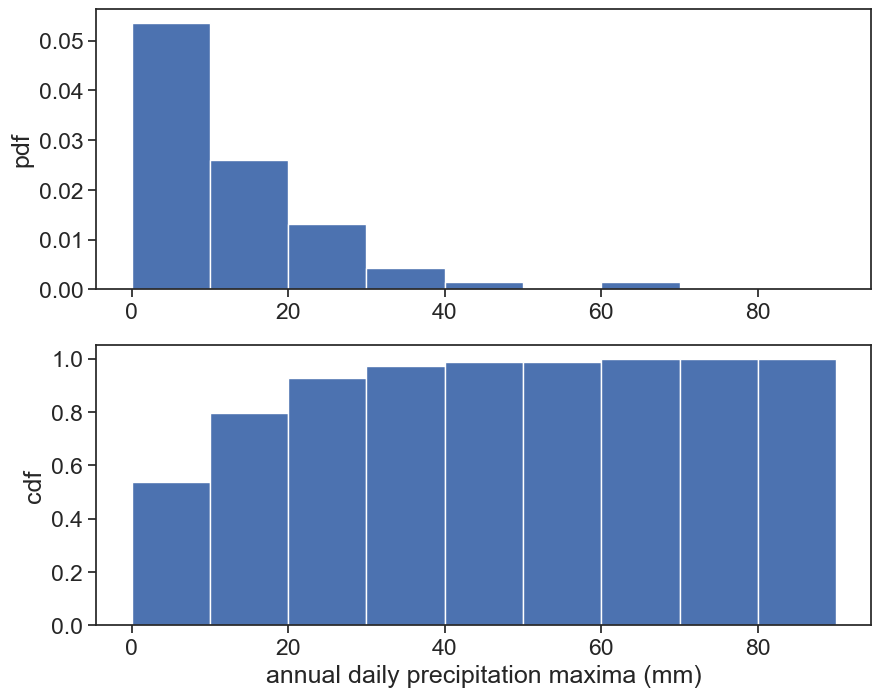

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

h=max_annual['PRCP'].values
ax1.hist(h, bins=np.arange(0,100,10), density=True)
ax2.hist(h, bins=np.arange(0,100,10), cumulative=1, density=True)

ax1.set(ylabel="pdf")
ax2.set(xlabel="annual daily precipitation maxima (mm)",
        ylabel="cdf",
        );

## Weibull plotting position

How to make a cdf by yourself?

In [33]:
# sort the annual daily precipitation maxima, from lowest to highest
max_annual['max_sorted'] = np.sort(max_annual['PRCP'])
# let's give it a name, h
h = max_annual['max_sorted'].values
# make an array "order" of size N=len(h), from 1 to N
N = len(h)
rank = np.arange(N) + 1
# make a new array, "rank"
cdf_weibull = rank / (N+1)

Plot it next to the cdf that pandas' `hist` makes for you. What do you see?

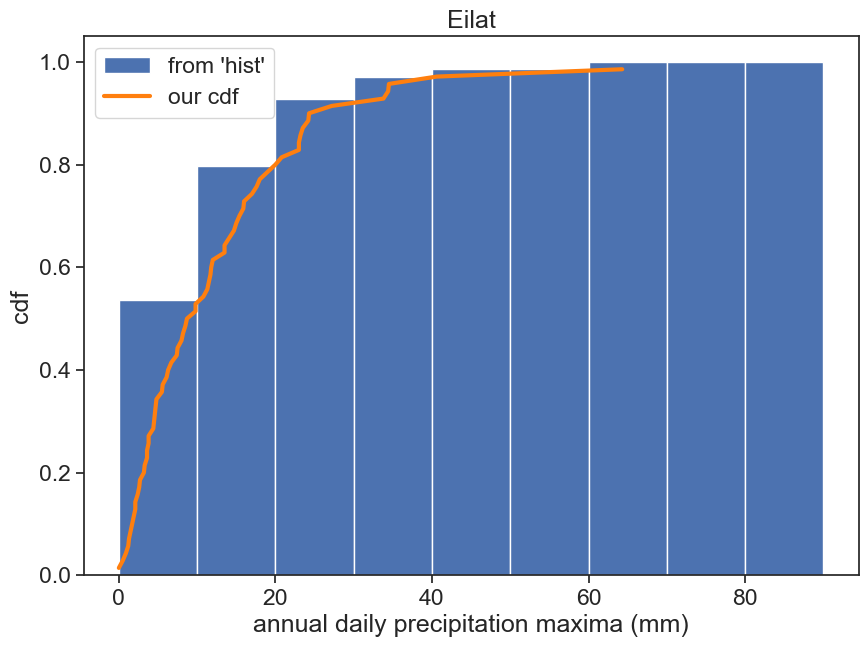

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(h, bins=np.arange(0,100,10), cumulative=1, density=True, label="from 'hist'")
ax.plot(h, cdf_weibull, color="tab:orange", linewidth=3, label="our cdf")
ax.set_ylabel("cdf")
ax.set_xlabel("annual daily precipitation maxima (mm)")
ax.set_title("Eilat")
ax.legend()


The generalized extreme value distribution has 3 parameters: shape, location, scale.

Let's get a "best fit" estimate of these parameters for Eilat's rainfall statistics.

In [35]:
params = genextreme.fit(h)
print("Best fit:")
print(f"shape = {params[0]:.2f}\nlocation = {params[1]:.2f}\nscale = {params[2]:.2f}")

Best fit:
shape = -0.42
location = 6.05
scale = 5.68


Let's see the GEV distribution for these parameters

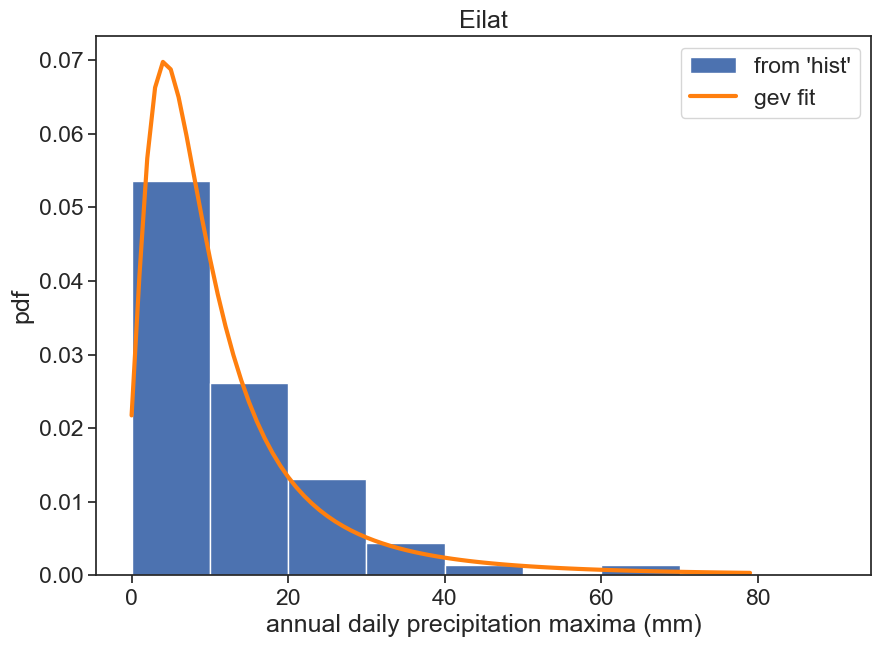

In [36]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(h, bins=np.arange(0,100,10), density=True, label="from 'hist'")
rain = np.arange(0,80)
pdf_rain = genextreme(c=params[0], loc=params[1], scale=params[2]).pdf(rain)
ax.plot(rain, pdf_rain, color="tab:orange", lw=3, label="gev fit")
ax.set_ylabel("pdf")
ax.set_xlabel("annual daily precipitation maxima (mm)")
ax.set_title("Eilat")
ax.legend()

We can do the same for the cdf...

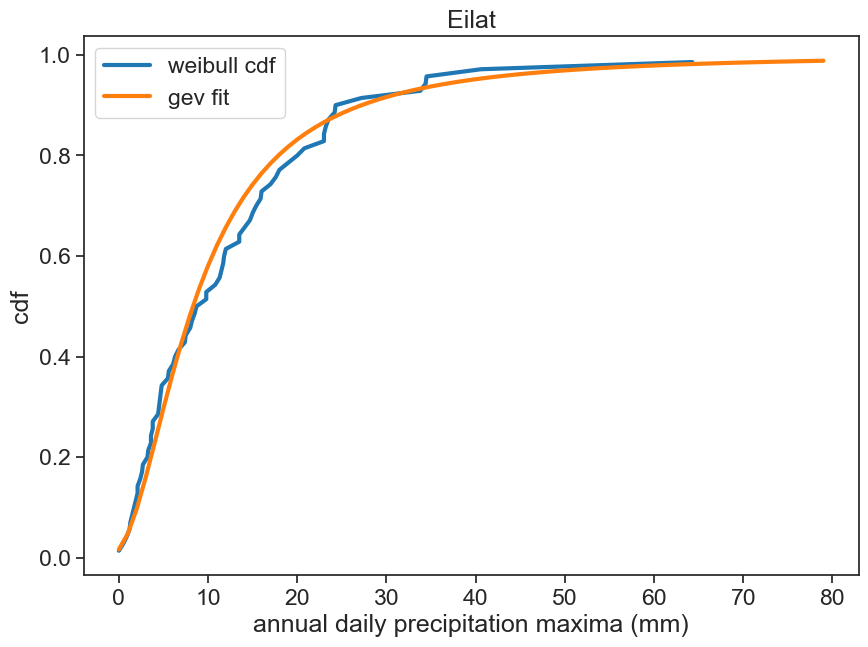

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(h, cdf_weibull, color="tab:blue", linewidth=3, label="weibull cdf")
rain = np.arange(0,80)
cdf_rain = genextreme(c=params[0], loc=params[1], scale=params[2]).cdf(rain)
ax.plot(rain, cdf_rain, color="tab:orange", lw=3, label="gev fit")
ax.set_ylabel("cdf")
ax.set_xlabel("annual daily precipitation maxima (mm)")
ax.set_title("Eilat")
ax.legend()

We are almost there! Remember that the return time are given by:

$$
T_r(x) = \frac{1}{1-F(x)},
$$

where $F$ is the cdf.

Survival $= 1-F$

The package that we are using, [scipy.stats.genextreme](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html) has a method called `isf`, or inverse survival function, which is exactly what we want! In order to use it, you have to feed it a "quantile" `q` or probability. Suppose you want to know how strong is a 1 in a 100 year event, then your return period is 100 (years), and the probability is simply its inverse, 1/100.

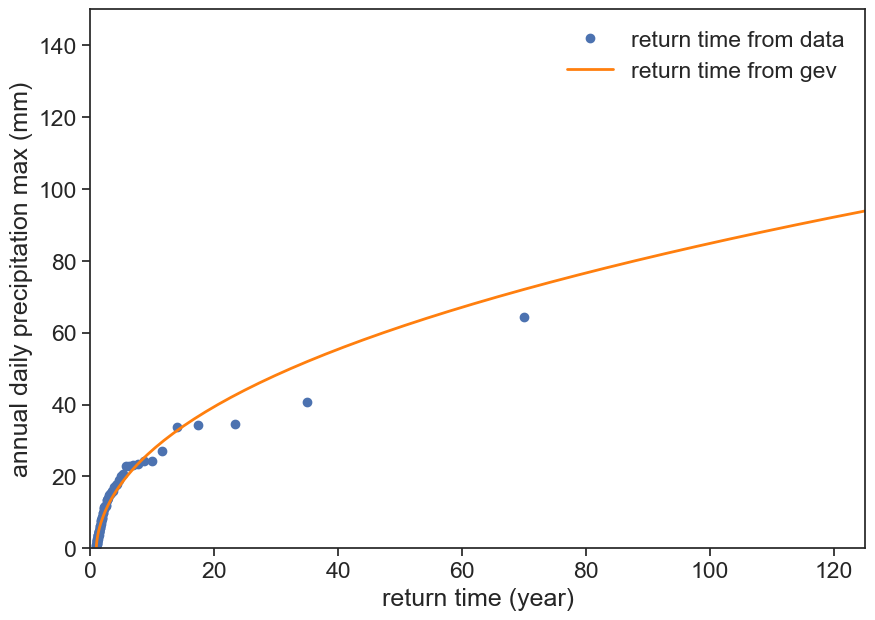

In [38]:
#| code-summary: "cdf as we are use to"
fig, ax = plt.subplots(figsize=(10,7))

T = 1 / (1-cdf_weibull)
ax.plot(T, h, 'o', label="return time from data")

rain = np.arange(0,150)
cdf_rain = genextreme(c=params[0], loc=params[1], scale=params[2]).cdf(rain)

ax.plot(1/(1-cdf_rain), rain, color='tab:orange', lw=2, label="return time from gev")
ax.legend(loc="upper right", frameon=False)
ax.set(xlabel="return time (year)",
       ylabel=f"annual daily precipitation max (mm)",
       xlim=[0, 125],
       ylim=[0, 150]);

In the code below, we use $1/T$ as the argument for `isf`. Why?

We know that

$$
T = \frac{1}{1-\text{CDF}} = \frac{1}{\text{SF}}
$$

If we take the reciprocal of the equation above, SF will become the inverse SF, or ISF:

$$
\text{ISF} = \frac{1}{T}
$$

The code below was heavily inspired by [this Stack Overflow response](https://stackoverflow.com/a/71209176).

In [39]:
# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100, 500])
return_levels = genextreme.isf(1/return_periods, *params)

print("Return levels:")
print()
print("Period    Level")
print("(years)   (mm)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Return levels:

Period    Level
(years)   (mm)
   5      17.88
  10      27.22
  20      39.36
  50      61.56
 100      84.84
 500     173.12


You might want to do the opposite: given a list of critical daily max levels, what are the return periods for them? In this case you can use the `sf` method, "survival function".

In [40]:
levels_mm = np.array([20, 50, 100, 200, 300])
return_per = 1/genextreme.sf(levels_mm, *params)

print("Return levels:")
print()
print("Level       Period")
print("(mm)       (years)")

for level,period in zip(levels_mm, return_per):
    print(f'{level:9.2f}  {period:4.0f}')

Return levels:

Level       Period
(mm)       (years)
    20.00     6
    50.00    32
   100.00   144
   200.00   698
   300.00  1798


## fit

Not always the fit operation succeeds. Sometimes, the fitted parameters yield curves that do not seem to describe well the pdf or the cdf we are studying. What to do?

1. **ALWAYS** check your parameters. Plot the fitted curve against the experimental data and see with your eyes if it makes sense.
1. If it doesn't make sense, you have to run `fit` again, with some changes. A common problem is that the algorithm chose initial values for the parameters that do not converge to the optimal parameters we are looking for. In this case, one needs to help `fit` by giving it initial guesses for the parameters, like this:

```python
location_guess = 6.0
scale_guess = 5.0
shape_guess = -0.5
params = genextreme.fit(data, shape_guess, loc=location_guess, scale=scale_guess)
```

More details on this can be found in the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit).